# PROJECT THREE (TRAIN.CSV)

In [24]:
import pandas as pd
train=pd.read_csv("train.csv")
train #PRINTING TO DISPLAY THE DATA SET

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,30469,2015-06-30,44,27.0,7.0,9.0,1.0,1975.0,2.0,6.0,...,15,5,0,15,26,1,2,84,6,7400000
30467,30470,2015-06-30,86,59.0,3.0,9.0,2.0,1935.0,4.0,10.0,...,313,128,24,98,182,1,82,171,15,25000000
30468,30471,2015-06-30,45,NaN,10.0,20.0,1.0,NaN,1.0,1.0,...,1,1,0,2,12,0,1,11,1,6970959
30469,30472,2015-06-30,64,32.0,5.0,15.0,1.0,2003.0,2.0,11.0,...,22,1,1,6,31,1,4,65,7,13500000


In [2]:
# Check the data types of the columns in the dataframe
print(train.dtypes)

id                      int64
timestamp              object
full_sq                 int64
life_sq               float64
floor                 float64
                       ...   
mosque_count_5000       int64
leisure_count_5000      int64
sport_count_5000        int64
market_count_5000       int64
price_doc               int64
Length: 292, dtype: object


In [3]:
# Identify the numeric and non-numeric columns. 
# These are necessary since we often treat them using different methods.

numeric_cols = train.select_dtypes(include=['number']).columns
print(numeric_cols)

non_numeric_cols = train.select_dtypes(exclude=['number']).columns
print(non_numeric_cols)

Index(['id', 'full_sq', 'life_sq', 'floor', 'max_floor', 'material',
       'build_year', 'num_room', 'kitch_sq', 'state',
       ...
       'cafe_count_5000_price_2500', 'cafe_count_5000_price_4000',
       'cafe_count_5000_price_high', 'big_church_count_5000',
       'church_count_5000', 'mosque_count_5000', 'leisure_count_5000',
       'sport_count_5000', 'market_count_5000', 'price_doc'],
      dtype='object', length=276)
Index(['timestamp', 'product_type', 'sub_area', 'culture_objects_top_25',
       'thermal_power_plant_raion', 'incineration_raion',
       'oil_chemistry_raion', 'radiation_raion', 'railroad_terminal_raion',
       'big_market_raion', 'nuclear_reactor_raion', 'detention_facility_raion',
       'water_1line', 'big_road1_1line', 'railroad_1line', 'ecology'],
      dtype='object')


In [4]:
# Missing data
# How to find out?
# Method #1: missing data (by columns) count & percentage
train[non_numeric_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   timestamp                  30471 non-null  object
 1   product_type               30471 non-null  object
 2   sub_area                   30471 non-null  object
 3   culture_objects_top_25     30471 non-null  object
 4   thermal_power_plant_raion  30471 non-null  object
 5   incineration_raion         30471 non-null  object
 6   oil_chemistry_raion        30471 non-null  object
 7   radiation_raion            30471 non-null  object
 8   railroad_terminal_raion    30471 non-null  object
 9   big_market_raion           30471 non-null  object
 10  nuclear_reactor_raion      30471 non-null  object
 11  detention_facility_raion   30471 non-null  object
 12  water_1line                30471 non-null  object
 13  big_road1_1line            30471 non-null  object
 14  railro

In [5]:
# Counts the missing values by columns
num_missing = train.isna().sum()
columns_with_missing = num_missing[num_missing > 0]

print(columns_with_missing)

life_sq                                   6383
floor                                      167
max_floor                                 9572
material                                  9572
build_year                               13605
num_room                                  9572
kitch_sq                                  9572
state                                    13559
preschool_quota                           6688
school_quota                              6685
hospital_beds_raion                      14441
raion_build_count_with_material_info      4991
build_count_block                         4991
build_count_wood                          4991
build_count_frame                         4991
build_count_brick                         4991
build_count_monolith                      4991
build_count_panel                         4991
build_count_foam                          4991
build_count_slag                          4991
build_count_mix                           4991
raion_build_c

In [6]:
# Calculate the percentages of missing values by columns
num_missing = train.isna().mean()
columns_with_missing = num_missing[num_missing > 0]

print(columns_with_missing)

life_sq                                  0.209478
floor                                    0.005481
max_floor                                0.314135
material                                 0.314135
build_year                               0.446490
num_room                                 0.314135
kitch_sq                                 0.314135
state                                    0.444980
preschool_quota                          0.219487
school_quota                             0.219389
hospital_beds_raion                      0.473926
raion_build_count_with_material_info     0.163795
build_count_block                        0.163795
build_count_wood                         0.163795
build_count_frame                        0.163795
build_count_brick                        0.163795
build_count_monolith                     0.163795
build_count_panel                        0.163795
build_count_foam                         0.163795
build_count_slag                         0.163795


In [7]:
# Get the shape of the dataframe
shape = train.shape
# Print the shape of the dataframe
print(shape)

(30471, 292)


In [8]:
# Printing the summary of the dataframe
print(train.describe())

                 id       full_sq       life_sq         floor     max_floor  \
count  30471.000000  30471.000000  24088.000000  30304.000000  20899.000000   
mean   15237.917397     54.214269     34.403271      7.670803     12.558974   
std     8796.501536     38.031487     52.285733      5.319989      6.756550   
min        1.000000      0.000000      0.000000      0.000000      0.000000   
25%     7620.500000     38.000000     20.000000      3.000000      9.000000   
50%    15238.000000     49.000000     30.000000      6.500000     12.000000   
75%    22855.500000     63.000000     43.000000     11.000000     17.000000   
max    30473.000000   5326.000000   7478.000000     77.000000    117.000000   

           material    build_year      num_room      kitch_sq         state  \
count  20899.000000  1.686600e+04  20899.000000  20899.000000  16912.000000   
mean       1.827121  3.068057e+03      1.909804      6.399301      2.107025   
std        1.481154  1.543878e+05      0.851805    

# Method #2: missing data (by columns) heatmap

<Axes: >

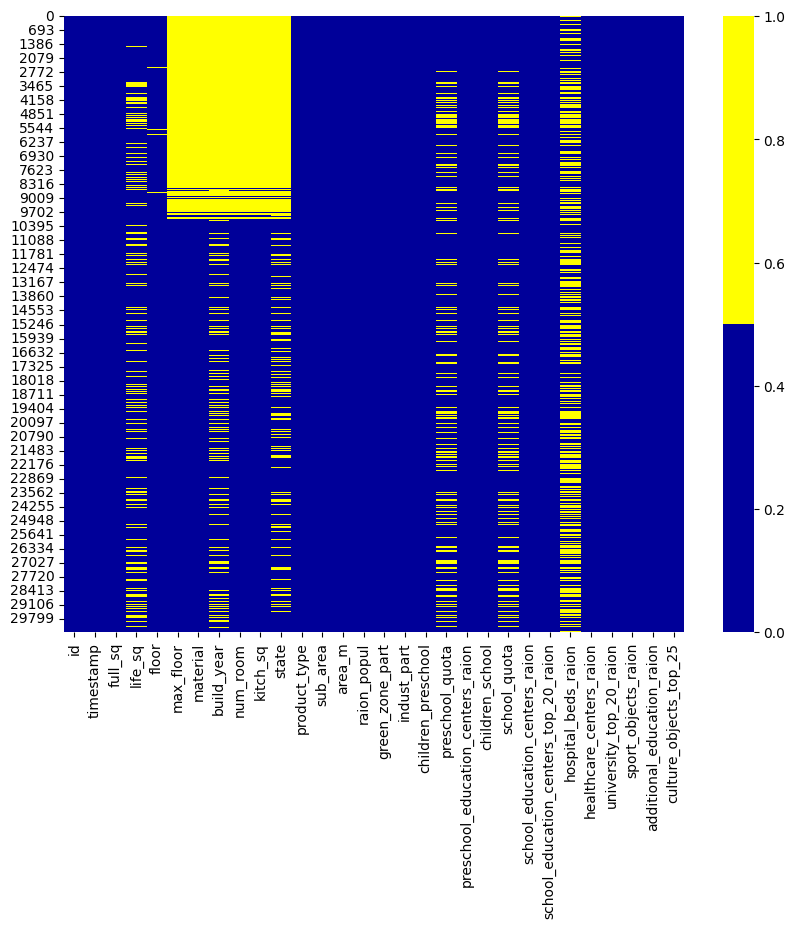

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))

cols = train.columns[:30]#uses data from index 1-30
colours = ['#000099', '#ffff00'] # specify colours: yellow - missing. blue - not missing
sns.heatmap(train[cols].isna(), cmap=sns.color_palette(colours))

<Axes: >

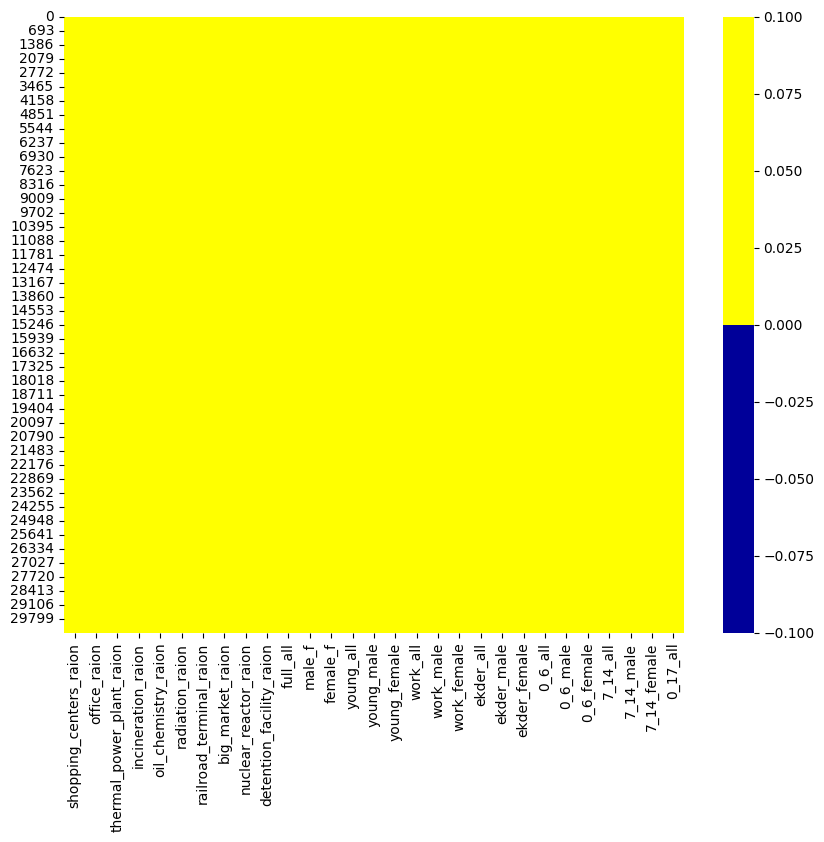

In [11]:
plt.figure(figsize=(10,8))

cols = train.columns[31:60]#uses data from index 31-60
colours = ['#000099', '#ffff00'] # specify colours: yellow - missing. blue - not missing
sns.heatmap(train[cols].isna(), cmap=sns.color_palette(colours))

# Method 3

<Axes: >

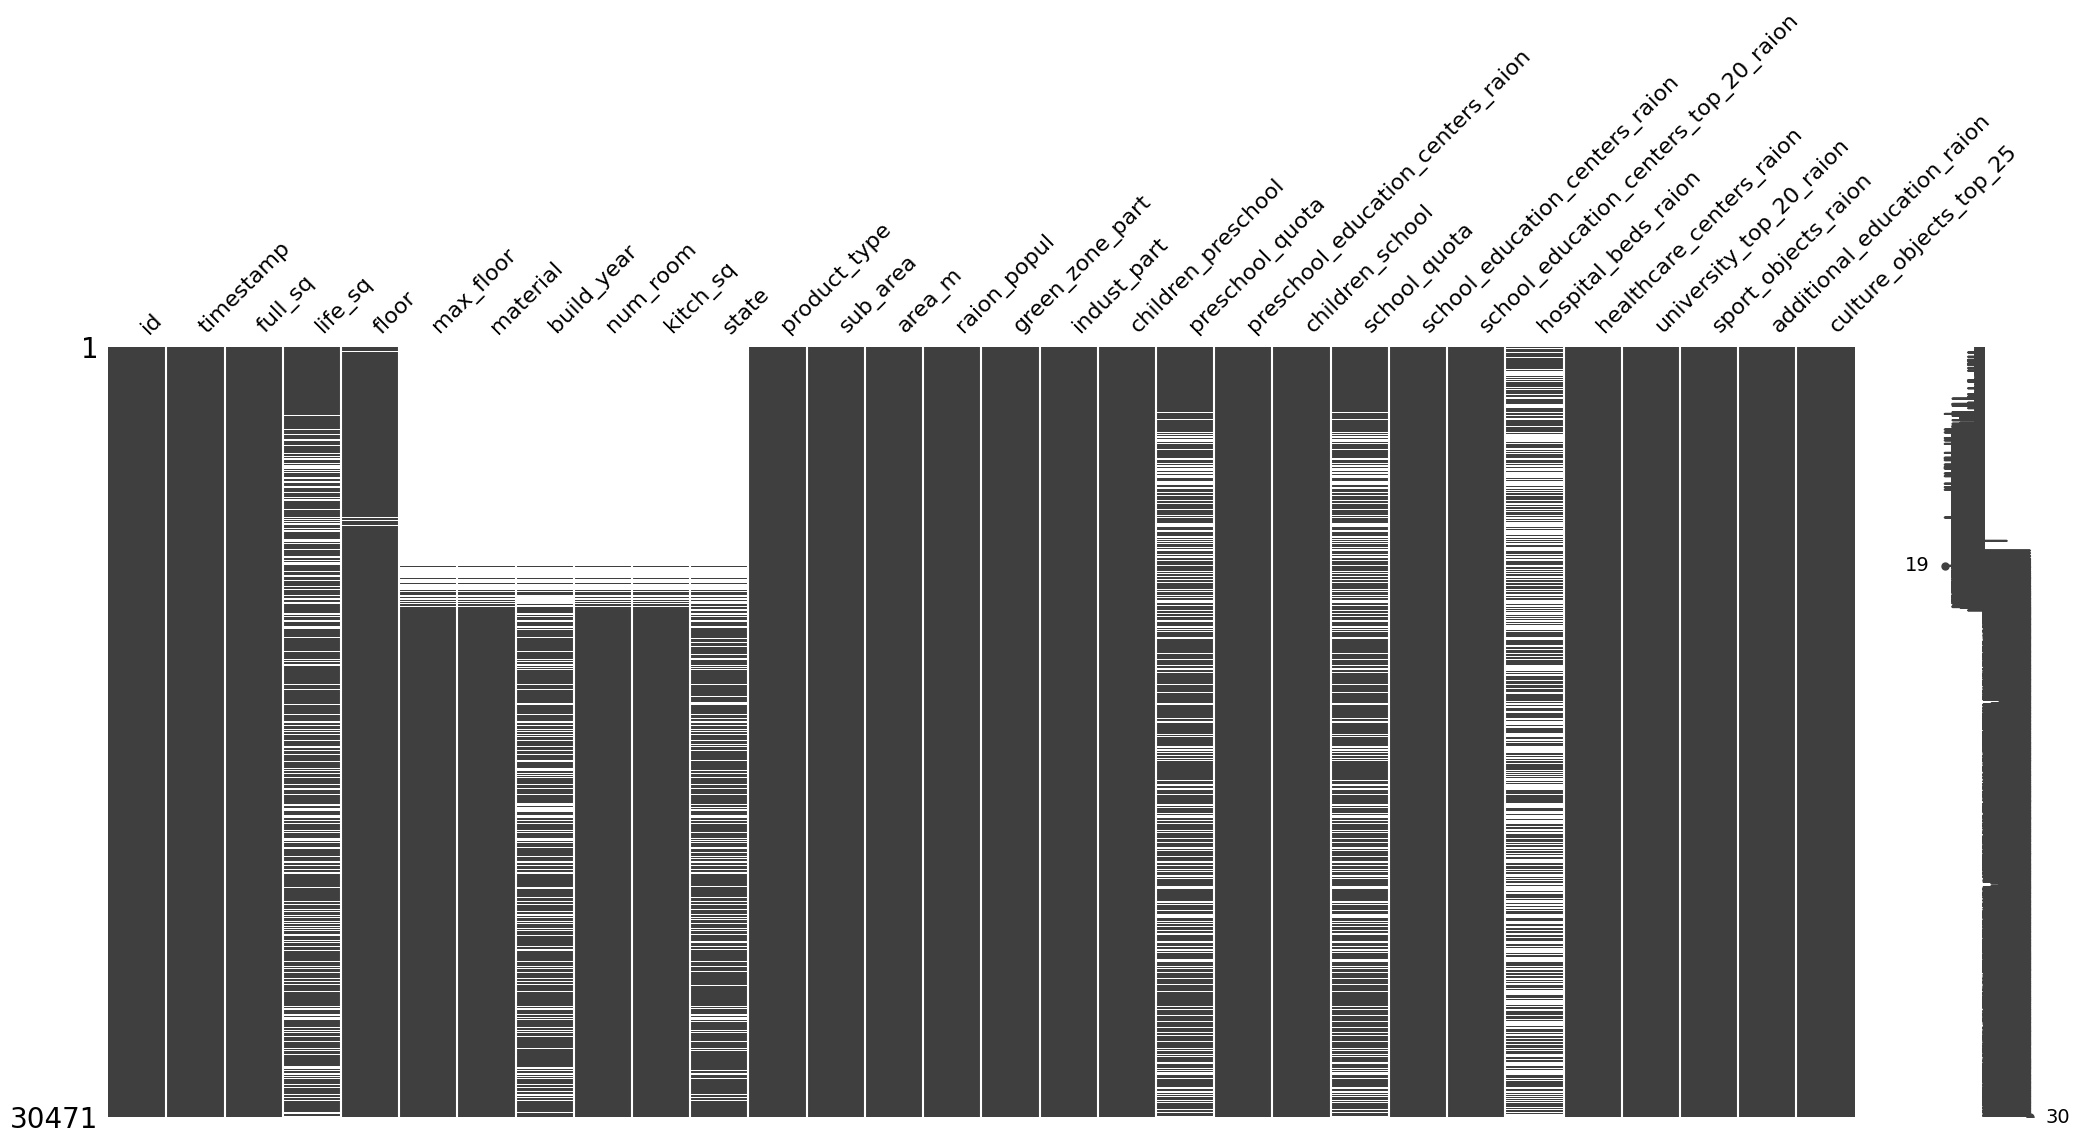

In [16]:
# Using missingno library
import missingno as msno
msno.matrix(train.iloc[:, :30])

# Method #3: missing data (by rows) histogram

<Axes: >

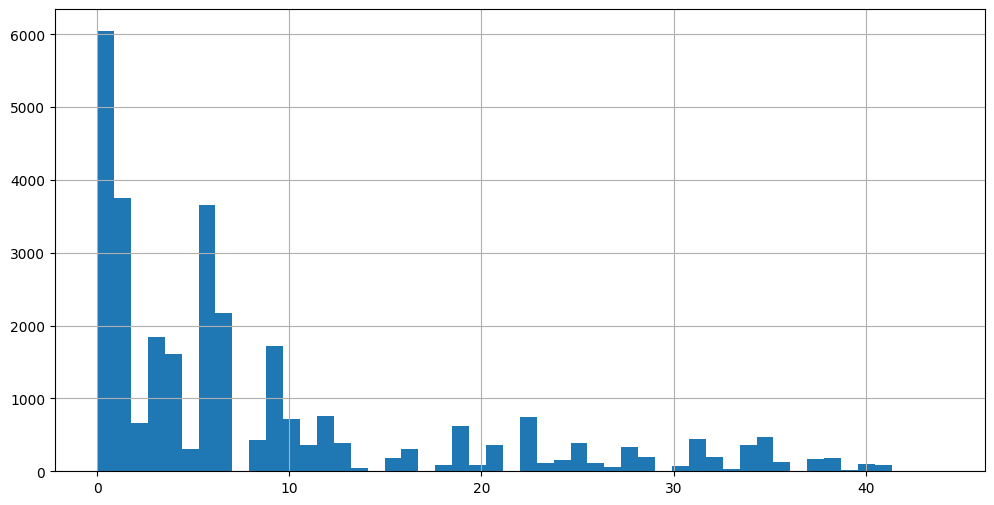

In [19]:
# Method #3: missing data (by rows) histogram
plt.figure(figsize=(12,6))
missing_by_row = train.isna().sum(axis='columns')
missing_by_row.hist(bins=50)

# DATA CLEANINIG

# Technique #1: drop columns / features

In [12]:
pct_missing = train.isna().mean()
pct_missing[pct_missing > .3]

max_floor                     0.314135
material                      0.314135
build_year                    0.446490
num_room                      0.314135
kitch_sq                      0.314135
state                         0.444980
hospital_beds_raion           0.473926
cafe_sum_500_min_price_avg    0.435857
cafe_sum_500_max_price_avg    0.435857
cafe_avg_price_500            0.435857
dtype: float64

In [29]:
# Drop columns with over 30% missing values
train.drop(columns=pct_missing[pct_missing > .3].index)

#same as code below
#train_less_missing_cols = train.loc[:, pct_missing <= .3].copy() 
#train_less_missing_cols.shape

,id,timestamp,full_sq,life_sq,floor,product_type,sub_area,area_m,raion_popul,green_zone_part,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,Investment,Bibirevo,6.407578e+06,155572,0.189727,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,Investment,Nagatinskij Zaton,9.589337e+06,115352,0.372602,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,Investment,Tekstil'shhiki,4.808270e+06,101708,0.112560,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,Investment,Mitino,1.258354e+07,178473,0.194703,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,Investment,Basmannoe,8.398461e+06,108171,0.015234,...,319,108,17,135,236,2,91,195,14,16331452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,30469,2015-06-30,44,27.0,7.0,Investment,Otradnoe,1.005305e+07,175518,0.096270,...,15,5,0,15,26,1,2,84,6,7400000
30467,30470,2015-06-30,86,59.0,3.0,Investment,Tverskoe,7.307411e+06,75377,0.065444,...,313,128,24,98,182,1,82,171,15,25000000
30468,30471,2015-06-30,45,NaN,10.0,OwnerOccupier,Poselenie Vnukovskoe,2.553630e+07,4001,0.496315,...,1,1,0,2,12,0,1,11,1,6970959
30469,30472,2015-06-30,64,32.0,5.0,Investment,Obruchevskoe,6.050065e+06,78616,0.167526,...,22,1,1,6,31,1,4,65,7,13500000


# Technique #2: drop rows / observations

In [13]:
train.dropna(axis='index', thresh=292-35+1).shape
#same as the code above
#train_less_missing_rows = train[missing_by_row < 35].copy()
#train_less_missing_rows.shape

(29302, 292)

# Technique #3: impute the missing with constant values

In [14]:
train_copy = train.copy()
train_copy[numeric_cols] = train_copy[numeric_cols].fillna(-999)
train_copy[non_numeric_cols] = train_copy[non_numeric_cols].fillna('MISSING')
train_copy.head(10)# displaying the first ten rows

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,319,108,17,135,236,2,91,195,14,16331452
5,6,2011-09-06,67,46.0,14.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,62,14,1,53,78,1,20,113,17,9100000
6,7,2011-09-08,25,14.0,10.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,81,16,3,38,80,1,27,127,8,5500000
7,8,2011-09-09,44,44.0,5.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,9,4,0,11,18,1,0,47,4,2000000
8,9,2011-09-10,42,27.0,5.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,19,8,1,18,34,1,3,85,11,5300000
9,10,2011-09-13,36,21.0,9.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,19,13,0,10,20,1,3,67,1,2000000


# Technique #4: impute the missing with statistics

In [15]:
# We can impute the numeric columns with their respective medians.

train_copy = train.copy()
med = train_copy[numeric_cols].median()
train_copy[numeric_cols] = train_copy[numeric_cols].fillna(med)
print(train_copy)# displaying the whole rows

          id   timestamp  full_sq  life_sq  floor  max_floor  material  \
0          1  2011-08-20       43     27.0    4.0       12.0       1.0   
1          2  2011-08-23       34     19.0    3.0       12.0       1.0   
2          3  2011-08-27       43     29.0    2.0       12.0       1.0   
3          4  2011-09-01       89     50.0    9.0       12.0       1.0   
4          5  2011-09-05       77     77.0    4.0       12.0       1.0   
...      ...         ...      ...      ...    ...        ...       ...   
30466  30469  2015-06-30       44     27.0    7.0        9.0       1.0   
30467  30470  2015-06-30       86     59.0    3.0        9.0       2.0   
30468  30471  2015-06-30       45     30.0   10.0       20.0       1.0   
30469  30472  2015-06-30       64     32.0    5.0       15.0       1.0   
30470  30473  2015-06-30       43     28.0    1.0        9.0       1.0   

       build_year  num_room  kitch_sq  ...  cafe_count_5000_price_2500  \
0          1979.0       2.0       6.0

In [16]:
# We can also impute the non-numeric columns with their most frequent values.

most_freq = train_copy[non_numeric_cols].describe().loc['top']
train_copy[non_numeric_cols] = train_copy[non_numeric_cols].fillna(most_freq)
most_freq.head(10)# displaying the first ten rows

timestamp                             2014-12-16
product_type                          Investment
sub_area                     Poselenie Sosenskoe
culture_objects_top_25                        no
thermal_power_plant_raion                     no
incineration_raion                            no
oil_chemistry_raion                           no
radiation_raion                               no
railroad_terminal_raion                       no
big_market_raion                              no
Name: top, dtype: object

# Checking a null value

In [17]:
train.isnull().sum()

id                       0
timestamp                0
full_sq                  0
life_sq               6383
floor                  167
                      ... 
mosque_count_5000        0
leisure_count_5000       0
sport_count_5000         0
market_count_5000        0
price_doc                0
Length: 292, dtype: int64

# Removing duplicates

In [18]:
train.drop_duplicates()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,30469,2015-06-30,44,27.0,7.0,9.0,1.0,1975.0,2.0,6.0,...,15,5,0,15,26,1,2,84,6,7400000
30467,30470,2015-06-30,86,59.0,3.0,9.0,2.0,1935.0,4.0,10.0,...,313,128,24,98,182,1,82,171,15,25000000
30468,30471,2015-06-30,45,NaN,10.0,20.0,1.0,NaN,1.0,1.0,...,1,1,0,2,12,0,1,11,1,6970959
30469,30472,2015-06-30,64,32.0,5.0,15.0,1.0,2003.0,2.0,11.0,...,22,1,1,6,31,1,4,65,7,13500000


In [20]:
def impute_with_medians(df, numeric_cols):
    """
    Impute missing values in numeric columns with their respective medians.

    Parameters:
        df (pandas.DataFrame): The DataFrame containing the data.
        numeric_cols (list): List of column names that are numeric.

    Returns:
        pandas.DataFrame: A new DataFrame with missing values imputed using medians.
    """
    df_copy = df.copy()
    med = df_copy[numeric_cols].median()
    df_copy[numeric_cols] = df_copy[numeric_cols].fillna(med)
    return df_copy


# OUTLIARS

# DESCRIPTIVE STATISTICS

kurtosis

In [21]:
train_copy.kurt(numeric_only=True)

id                       -1.199940
full_sq               12128.727462
life_sq               21525.232637
floor                     1.759775
max_floor                11.030696
                          ...     
mosque_count_5000         0.054903
leisure_count_5000       12.056583
sport_count_5000          1.414092
market_count_5000        -1.024059
price_doc                44.027368
Length: 276, dtype: float64

In [23]:
train['life_sq'].describe()

count    24088.000000
mean        34.403271
std         52.285733
min          0.000000
25%         20.000000
50%         30.000000
75%         43.000000
max       7478.000000
Name: life_sq, dtype: float64

# Method #2: histogram & box plot

<Axes: >

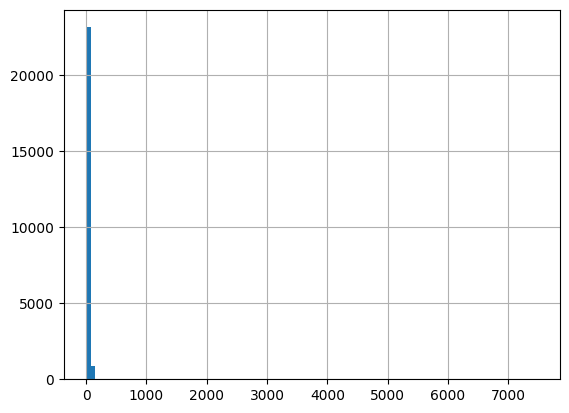

In [32]:
train['life_sq'].hist(bins=100)



<Axes: >

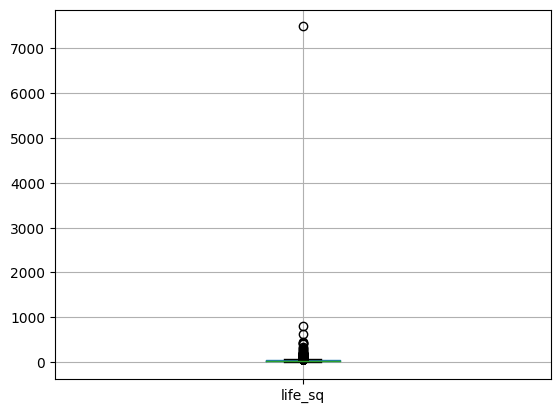

In [31]:
train.boxplot(column=['life_sq'])

# Method #3: bar chart

<Axes: >

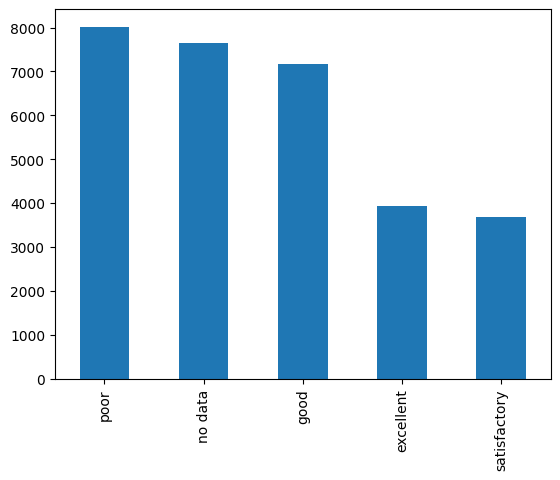

In [33]:
train['ecology'].value_counts().plot(kind='bar')

In [34]:
num_rows = len(train)

for col in train.columns:
    cnts = train[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.999:
        print('{0}: {1:.2f}%'.format(col, top_pct*100))
        print(cnts)
        print()
        
        
#in the set above, there is no such 

# Unnecessary type #2: duplicates

# Duplicates type #1: all columns based

In [36]:
train[train.duplicated()]

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc


# code to drop the duplicate incase there is one

In [37]:
train.drop_duplicates()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,30469,2015-06-30,44,27.0,7.0,9.0,1.0,1975.0,2.0,6.0,...,15,5,0,15,26,1,2,84,6,7400000
30467,30470,2015-06-30,86,59.0,3.0,9.0,2.0,1935.0,4.0,10.0,...,313,128,24,98,182,1,82,171,15,25000000
30468,30471,2015-06-30,45,NaN,10.0,20.0,1.0,NaN,1.0,1.0,...,1,1,0,2,12,0,1,11,1,6970959
30469,30472,2015-06-30,64,32.0,5.0,15.0,1.0,2003.0,2.0,11.0,...,22,1,1,6,31,1,4,65,7,13500000


# Duplicates type #2: key columns based
We first drop id, and then see if there are duplicated rows from the DataFrame.

In [38]:
train[train.drop(columns=['id']).duplicated()]

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
3359,3362,2012-08-27,59,NaN,6.0,NaN,NaN,NaN,NaN,NaN,...,4,2,0,3,15,1,0,24,4,4506800
4328,4331,2012-10-22,61,NaN,18.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,5,4,0,1,32,5,8248500
6991,6994,2013-04-03,42,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,3,2,0,2,16,1,0,20,4,3444000
8059,8062,2013-05-22,68,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,3,2,0,2,16,1,0,20,4,5406690
8653,8656,2013-06-24,40,NaN,12.0,NaN,NaN,NaN,NaN,NaN,...,1,0,0,4,6,0,0,4,1,4112800
14004,14007,2014-01-22,46,28.0,1.0,9.0,1.0,1968.0,2.0,5.0,...,10,1,0,13,15,1,1,61,4,3000000
17404,17407,2014-04-15,134,134.0,1.0,1.0,1.0,0.0,3.0,0.0,...,0,0,0,0,1,0,0,0,0,5798496
26675,26678,2014-12-17,62,NaN,9.0,17.0,1.0,NaN,2.0,1.0,...,371,141,26,150,249,2,105,203,13,6552000
28361,28364,2015-03-14,62,NaN,2.0,17.0,1.0,NaN,2.0,1.0,...,371,141,26,150,249,2,105,203,13,6520500
28712,28715,2015-03-30,41,41.0,11.0,17.0,1.0,2016.0,1.0,41.0,...,2,2,0,2,9,0,0,7,2,4114580


# We drop the ten duplicate columns then we can also compare the shapes of the two datasets (df and df_dedupped).

In [40]:
train_dedupped = train.drop(columns=['id']).drop_duplicates()

In [42]:
print(train.shape)
print(train_dedupped.shape)

(30471, 292)
(30461, 291)


# Inconsistent data

Inconsistent type #1: capitalization

In [43]:
train['sub_area'].value_counts(dropna=False)

Poselenie Sosenskoe               1776
Nekrasovka                        1611
Poselenie Vnukovskoe              1372
Poselenie Moskovskij               925
Poselenie Voskresenskoe            713
                                  ... 
Molzhaninovskoe                      3
Poselenie Shhapovskoe                2
Poselenie Kievskij                   2
Poselenie Klenovskoe                 1
Poselenie Mihajlovo-Jarcevskoe       1
Name: sub_area, Length: 146, dtype: int64

In [45]:
train['sub_area_lower'] = train['sub_area'].str.lower()
train['sub_area_lower'].value_counts(dropna=False)

poselenie sosenskoe               1776
nekrasovka                        1611
poselenie vnukovskoe              1372
poselenie moskovskij               925
poselenie voskresenskoe            713
                                  ... 
molzhaninovskoe                      3
poselenie shhapovskoe                2
poselenie kievskij                   2
poselenie klenovskoe                 1
poselenie mihajlovo-jarcevskoe       1
Name: sub_area_lower, Length: 146, dtype: int64

# Inconsistent type #2: data types

In [46]:
train['timestamp']

0        2011-08-20
1        2011-08-23
2        2011-08-27
3        2011-09-01
4        2011-09-05
            ...    
30466    2015-06-30
30467    2015-06-30
30468    2015-06-30
30469    2015-06-30
30470    2015-06-30
Name: timestamp, Length: 30471, dtype: object

# We can convert the column to a DateTime format and even extract the specific year, month, weekday, etc.

In [50]:
train['timestamp_dt'] = pd.to_datetime(train['timestamp'], format='%Y-%m-%d')
train['year'] = train['timestamp_dt'].dt.year
train['month'] = train['timestamp_dt'].dt.month
train['weekday'] = train['timestamp_dt'].dt.weekday

train[['timestamp_dt', 'year', 'month', 'weekday']].head()

,timestamp_dt,year,month,weekday
0,2011-08-20,2011,8,5
1,2011-08-23,2011,8,1
2,2011-08-27,2011,8,5
3,2011-09-01,2011,9,3
4,2011-09-05,2011,9,0


# Inconsistent type #3: typos of categorical values

In [51]:
train_city_ex = pd.DataFrame(data={'city': ['torontoo', 'toronto', 'tronto', 'vancouver', 'vancover', 'vancouvr', 'montreal', 'calgary']})

cities = ['toronto', 'vancouver', 'montreal', 'calgary']
from nltk.metrics import edit_distance
for city in cities:
    train_city_ex[f'city_distance_{city}'] = train_city_ex['city'].map(lambda x: edit_distance(x, city))

train_city_ex

,city,city_distance_toronto,city_distance_vancouver,city_distance_montreal,city_distance_calgary
0,torontoo,1,8,7,8
1,toronto,0,8,7,7
2,tronto,1,8,6,7
3,vancouver,8,0,8,8
4,vancover,7,1,7,7
5,vancouvr,7,1,7,7
6,montreal,7,8,0,8
7,calgary,7,8,8,0


# the below code sets all the values within 2 characters distance from ‘toronto’/’vancouver’ to be ‘toronto’/’vancouver’.

In [53]:
msk = train_city_ex['city_distance_toronto'] <= 2
train_city_ex.loc[msk, 'city'] = 'toronto'

msk = train_city_ex['city_distance_vancouver'] <= 2
train_city_ex.loc[msk, 'city'] = 'vancouver'

train_city_ex

,city,city_distance_toronto,city_distance_vancouver,city_distance_montreal,city_distance_calgary
0,toronto,1,8,7,8
1,toronto,0,8,7,7
2,toronto,1,8,6,7
3,vancouver,8,0,8,8
4,vancouver,7,1,7,7
5,vancouver,7,1,7,7
6,montreal,7,8,0,8
7,calgary,7,8,8,0


# Inconsistent type #4: addresses

I have created this data set below and worked on it

In [54]:
df_add_ex = pd.DataFrame(['123 MAIN St Apartment 15', '123 Main Street Apt 12   ', '543 FirSt Av', '  876 FIRst Ave.'], columns=['address'])
df_add_ex

,address
0,123 MAIN St Apartment 15
1,123 Main Street Apt 12
2,543 FirSt Av
3,876 FIRst Ave.


In [55]:
df_add_ex['address_std'] = df_add_ex['address'].str.lower()
df_add_ex['address_std'] = df_add_ex['address_std'].str.strip() # remove leading and trailing whitespaces.
df_add_ex['address_std'] = df_add_ex['address_std'].str.replace('\\.', '', regex=True) # remove period.
df_add_ex['address_std'] = df_add_ex['address_std'].str.replace('\\bstreet\\b', 'st', regex=True) # replace street with st.
df_add_ex['address_std'] = df_add_ex['address_std'].str.replace('\\bapartment\\b', 'apt', regex=True) # replace apartment with apt.
df_add_ex['address_std'] = df_add_ex['address_std'].str.replace('\\bav\\b', 'ave', regex=True) # replace av with ave.

df_add_ex

,address,address_std
0,123 MAIN St Apartment 15,123 main st apt 15
1,123 Main Street Apt 12,123 main st apt 12
2,543 FirSt Av,543 first ave
3,876 FIRst Ave.,876 first ave
